In [137]:
from scipy.linalg import eigh
import numpy as np
import matplotlib.pyplot as plt


def load_and_center_dataset(filename):
    # TODO: add your code here
    x = np.load(filename)
    np.mean(x, axis=0)
    x = x - np.mean(x, axis=0)
    return x

def get_covariance(dataset):
    # TODO: add your code here
    n = len(dataset)
    return (1/(n-1))*np.dot(np.transpose(dataset), dataset)
    
def get_eig(S, m):
    # TODO: add your code here
    n = len(S)
    Lambda, U = eigh(S, subset_by_index=[n-m, n-1])
    Lambda = Lambda[::-1]
    Lambda = np.diag(Lambda)
    U = np.flip(U, 1)
    return Lambda, U
    
def get_eig_perc(S, perc):
    # TODO: add your code here
    val = eigh(S, eigvals_only = True)
    sumVal = sum(val)
    count = 0
    for value in val:
        if value/sumVal > perc:
            count += 1
    n = len(S)
    Lambda, U = eigh(S, subset_by_index=[n-count, n-1])
    Lambda = Lambda[::-1]
    Lambda = np.diag(Lambda)
    U = np.flip(U, 1)
    return Lambda, U
    
def project_image(img, U):
    # TODO: add your code here
    imgAlpha = np.transpose(U)@img
    project = np.transpose(imgAlpha) @ np.transpose(U)
    return project

def display_image(orig, proj):
    # TODO: add your code here
    original = np.reshape(orig, (32, 32))
    original = np.transpose(original)
    projection = np.reshape(proj, (32,32))
    projection = np.transpose(projection)
    fig, axs = plt.subplots(1, 2)
    axs[0].set_title('Original')
    axs[1].set_title('Projection')
    originalPlot = axs[0].imshow(original, aspect='equal')
    projectionPlot = axs[1].imshow(projection, aspect='equal')
    fig.colorbar(originalPlot, ax=axs[0])
    fig.colorbar(projectionPlot, ax=axs[1])
    plt.show()

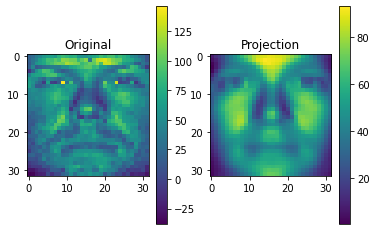

In [135]:
x = load_and_center_dataset('YaleB_32x32.npy')
S = get_covariance(x)
Lambda, U = get_eig(S, 2)
projection = project_image(x[0], U)
display_image(x[0], projection)